In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [5]:
# Initialisierung von DataFrames und Data Cleaning
df = pd.read_csv('Laptop-Preise.csv', sep=';', decimal=',')
print(df.describe())
df = df[df.extern_Schnittstellen != 2300] # Ausreißer löschen
df = df.reset_index(drop=True) # Reset Index
df_noPrice = df.drop('Preis', axis=1)

# Skalierung (Standardisierung) von df_noPrice
col_names = df_noPrice.columns

scaler = StandardScaler().fit(df_noPrice.values)
df_noPrice = scaler.transform(df_noPrice.values)
df_noPrice = pd.DataFrame(df_noPrice, columns=col_names)

             Preis        Kerne  Takt_Prozessor  Arbeitsspeicher  \
count  1039.000000  1039.000000     1039.000000      1039.000000   
mean   1332.870953     4.238691     2011.549567        11.849856   
std     748.949965     1.312752      405.788328         6.048661   
min     199.000000     2.000000     1100.000000         4.000000   
25%     769.000000     4.000000     1600.000000         8.000000   
50%    1099.000000     4.000000     1800.000000         8.000000   
75%    1699.000000     4.000000     2300.000000        16.000000   
max    3999.000000     8.000000     3400.000000        32.000000   

       Bild_Display  Speicher_Grafik  extern_Schnittstellen          HDD  \
count   1039.000000      1039.000000            1039.000000  1039.000000   
mean      15.073051      1986.895091               8.129933   193.220404   
std        1.271052      2401.766337              71.185201   401.136848   
min       11.600000         0.000000               2.000000     0.000000   
25%    

In der darunter folgenden Zelle probieren wir aus, ob die Reihenfolge der Standardisierung eine Rolle spielt. Hier führen wir die Regression ohne Standardisierung durch und standardisieren zum Schluss die Betas. Wir können sehen, dass dies die gleichen standardisierten Regressionskoeffizienten sind, wie bei jeder anderen möglichen Reihenfolge der Standardisierung.

In [37]:
# df.drop(['Betriebssystem_OHNE', 'Betriebssystem_Mac', 'Marke_Dell', 'Speicher_Grafik', 'Pixelshader'], axis=1, inplace=True)
# model = sm.OLS(df['Preis'], sm.add_constant(df.drop(['Preis'], axis=1))).fit()

# std_y = df['Preis'].std()
# standardized_coefs = abs(model.params[1:] * df.drop(['Preis'], axis=1).std() / std_y)
# print(standardized_coefs.abs().head(5))

Kerne                    0.183023
Takt_Prozessor           0.095150
Arbeitsspeicher          0.264349
Bild_Display             0.011136
extern_Schnittstellen    0.057341
dtype: float64


In der darunter folgenden Zelle probieren wir aus, ob die Reihenfolge der Standardisierung eine Rolle spielt. In der Arbeit standardisieren wir die Koeffizienten, aber nicht den Preis. Wenn wir anschließend die standardisierten Regressionskoeffizienten berechnen, dann teilen wir schlussendlich durch die Standardabweichung des Preises (die einzige Variable, die nicht standardisiert ist). Wir können aber in dem Output der Zelle sehen, das dies keinen Einfluss auf unsere standardisierten Regressionskoeffizienten hat.

In [39]:
# ###################### Ausprobieren, ob die Std.Coefs. identisch sind.
# # OLS Model 
# # fitting the model 
# df.drop(['Betriebssystem_OHNE', 'Betriebssystem_Mac', 'Marke_Dell', 'Speicher_Grafik', 'Pixelshader'], axis=1, inplace=True)
# col_names_2 = df.columns
# scaler = StandardScaler().fit(df.values)
# df = scaler.transform(df.values)
# df = pd.DataFrame(df, columns=col_names_2)

# model = sm.OLS(df['Preis'], sm.add_constant(df.drop(['Preis'], axis=1))).fit()

# standardized_coefs = abs(model.params[1:])
# print(standardized_coefs.abs().head(5))

Kerne                    0.183023
Takt_Prozessor           0.095150
Arbeitsspeicher          0.264349
Bild_Display             0.011136
extern_Schnittstellen    0.057341
dtype: float64


Wir untersuchen, ob sich Kollinearität in dem Modell befindet. Dazu schauen wir uns den VIF der Exogenen an (in standardisierter Form).
Wir können sehen, dass die Marken und die Betriebssysteme Multikollinearität aufweisen. Deswegen entfernen wir sie aus dem Datensatz.

In [66]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df_noPrice.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_noPrice.values, i) 
                          for i in range(len(df_noPrice.columns))]
print(vif_data.to_latex(escape=False, float_format="%.2f"))

c:\Users\ckopp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


\begin{tabular}{llr}
\toprule
{} &                         feature &  VIF \\
\midrule
0  &                           Kerne & 3.13 \\
1  &                  Takt_Prozessor & 2.21 \\
2  &                 Arbeitsspeicher & 2.42 \\
3  &                    Bild_Display & 2.78 \\
4  &                 Speicher_Grafik & 6.71 \\
5  &           extern_Schnittstellen & 2.28 \\
6  &                             HDD & 1.57 \\
7  &                             SSD & 2.00 \\
8  &                 Akku_Kapazitaet & 3.41 \\
9  &                     PPI_Display & 2.14 \\
10 &                     Pixelshader & 5.91 \\
11 &       Typ_Arbeitsspeicher_DDR_4 & 1.81 \\
12 &              Laufwerk_VORHANDEN & 1.83 \\
13 &     Lautsprecher_UEBERDURCHSCHN & 1.37 \\
14 &  Tastatur_Beleuchtung_vorhanden & 1.76 \\
15 &   Fingerabdrucksensor_vorhanden & 1.74 \\
16 &           Touchscreen_vorhanden & 1.47 \\
17 &             Mobilfunk_vorhanden & 1.47 \\
18 &                   NFC_vorhanden & 1.52 \\
19 &                 

C:\Users\ckopp\AppData\Local\Temp\ipykernel_4416\3457183256.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(vif_data.to_latex(escape=False, float_format="%.2f"))


Wenn wir nun erneut den VIF berechnen, stellen wir fest, dass wir immer noch zwei Variablen in dem Datensatz haben, deren VIF >5 ist. Wir entfernen die beiden Variablen ebenfalls aus dem Datensatz, um auf Nummer Sicher zu gehen, dass die Variablen keine Multikollinearität aufweisen.

In [67]:
# Variablen löschen, die einen unendlich hohen VIF haben
df_noPrice.drop(['Betriebssystem_OHNE', 'Betriebssystem_Mac', 'Marke_Dell'], axis=1, inplace=True) # Mac und Marke_Apple sind identische Merkmale
vif_data = pd.DataFrame() 
vif_data["feature"] = df_noPrice.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_noPrice.values, i) 
                          for i in range(len(df_noPrice.columns))]
print(vif_data)

                           feature       VIF
0                            Kerne  3.126279
1                   Takt_Prozessor  2.211199
2                  Arbeitsspeicher  2.416486
3                     Bild_Display  2.776998
4                  Speicher_Grafik  6.709259
5            extern_Schnittstellen  2.275336
6                              HDD  1.571629
7                              SSD  1.995732
8                  Akku_Kapazitaet  3.414778
9                      PPI_Display  2.136790
10                     Pixelshader  5.914094
11       Typ_Arbeitsspeicher_DDR_4  1.810548
12              Laufwerk_VORHANDEN  1.831122
13     Lautsprecher_UEBERDURCHSCHN  1.372499
14  Tastatur_Beleuchtung_vorhanden  1.757679
15   Fingerabdrucksensor_vorhanden  1.743949
16           Touchscreen_vorhanden  1.474072
17             Mobilfunk_vorhanden  1.469378
18                   NFC_vorhanden  1.517686
19                    Akku_Typ_ION  1.681354
20                        Marke_HP  3.010897
21        

Nachdem wir 'Specher_Grafik' und 'Pixelshader' ebenfalls entfernt haben, können wir sehen, dass die restlichen Variablen einen annehmbar kleinen VIF haben. Es gibt also keinen Grund mehr zu vermuten, dass Multikollinearität vorliegt.

In [68]:
df_noPrice.drop(['Speicher_Grafik', 'Pixelshader'], axis=1, inplace=True) # Mac und Marke_Apple sind identische Merkmale
vif_data = pd.DataFrame() 
vif_data["feature"] = df_noPrice.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_noPrice.values, i) 
                          for i in range(len(df_noPrice.columns))]
print(vif_data.to_latex(escape=False, float_format="%.2f"))

\begin{tabular}{llr}
\toprule
{} &                         feature &  VIF \\
\midrule
0  &                           Kerne & 2.67 \\
1  &                  Takt_Prozessor & 1.82 \\
2  &                 Arbeitsspeicher & 2.41 \\
3  &                    Bild_Display & 2.59 \\
4  &           extern_Schnittstellen & 2.22 \\
5  &                             HDD & 1.48 \\
6  &                             SSD & 1.95 \\
7  &                 Akku_Kapazitaet & 3.25 \\
8  &                     PPI_Display & 2.12 \\
9  &       Typ_Arbeitsspeicher_DDR_4 & 1.79 \\
10 &              Laufwerk_VORHANDEN & 1.81 \\
11 &     Lautsprecher_UEBERDURCHSCHN & 1.37 \\
12 &  Tastatur_Beleuchtung_vorhanden & 1.69 \\
13 &   Fingerabdrucksensor_vorhanden & 1.72 \\
14 &           Touchscreen_vorhanden & 1.47 \\
15 &             Mobilfunk_vorhanden & 1.46 \\
16 &                   NFC_vorhanden & 1.51 \\
17 &                    Akku_Typ_ION & 1.66 \\
18 &                        Marke_HP & 3.01 \\
19 &                 

C:\Users\ckopp\AppData\Local\Temp\ipykernel_4416\3503321875.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(vif_data.to_latex(escape=False, float_format="%.2f"))


Wir führen anschließend eine Regression durch, in der wir den Preis auf die (std.) Exogenen regressieren. Anschließend lassen wir uns die standardisierten Regressionskoeffizienten anzeigen. Wir haben weiter oben eine ähnliche Rechnung ausgeführt, um zu zeigen, dass die Reihenfolge der Standardisierung keine Rolle spielt. Auch, wenn dies kein eindeutiger Beweis ist, können wir davon ausgehen, dass die Rechnung kommutativ ist.

In [69]:
# OLS Model 
# fitting the model 
model = sm.OLS(df['Preis'], sm.add_constant(df_noPrice)).fit()
print('#'*23, '\n', 'SE von Preis = ', np.round(stats.sem(df['Preis']), 4), '\n', '#'*23, '\n', sep="")


std_y = df['Preis'].std()
std_x = df_noPrice.std()

# model.params[1:] sind alle Koeffizienten ohne Intercept
# Multipliziert mit ihrer Standardabweichung und geteilt durch die Standardabweichung von y (Preis)
standardized_coefs = abs(model.params[1:] * df_noPrice.std() / std_y)
print(standardized_coefs.abs())


#######################
SE von Preis = 23.2318
#######################

Kerne                             0.183023
Takt_Prozessor                    0.095150
Arbeitsspeicher                   0.264349
Bild_Display                      0.011136
extern_Schnittstellen             0.057341
HDD                               0.018837
SSD                               0.127256
Akku_Kapazitaet                   0.263603
PPI_Display                       0.105970
Typ_Arbeitsspeicher_DDR_4         0.084911
Laufwerk_VORHANDEN                0.032354
Lautsprecher_UEBERDURCHSCHN       0.032860
Tastatur_Beleuchtung_vorhanden    0.080195
Fingerabdrucksensor_vorhanden     0.020397
Touchscreen_vorhanden             0.047254
Mobilfunk_vorhanden               0.121274
NFC_vorhanden                     0.038070
Akku_Typ_ION                      0.044036
Marke_HP                          0.012819
Marke_ASUS                        0.011147
Marke_Acer                        0.004155
Marke_Apple              

In [70]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:43:21   Log-Likelihood:                -7295.8
No. Observations:                1038   AIC:                         1.465e+04
Df Residuals:                    1010   BIC:                         1.479e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [71]:
sorted_coefs = standardized_coefs.sort_values(ascending=False)

# Hier gebe ich die Koeffizienten mit den größten Erklärungsgehältern aus.
top_5_coefs = sorted_coefs.head(12)
print(top_5_coefs)

Arbeitsspeicher                   0.264349
Akku_Kapazitaet                   0.263603
Marke_Apple                       0.254216
Kerne                             0.183023
Betriebssystem_Windows            0.127707
SSD                               0.127256
Mobilfunk_vorhanden               0.121274
PPI_Display                       0.105970
Takt_Prozessor                    0.095150
Marke_Lenovo                      0.088285
Typ_Arbeitsspeicher_DDR_4         0.084911
Tastatur_Beleuchtung_vorhanden    0.080195
dtype: float64


C:\Users\ckopp\AppData\Local\Temp\ipykernel_4416\2758031984.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


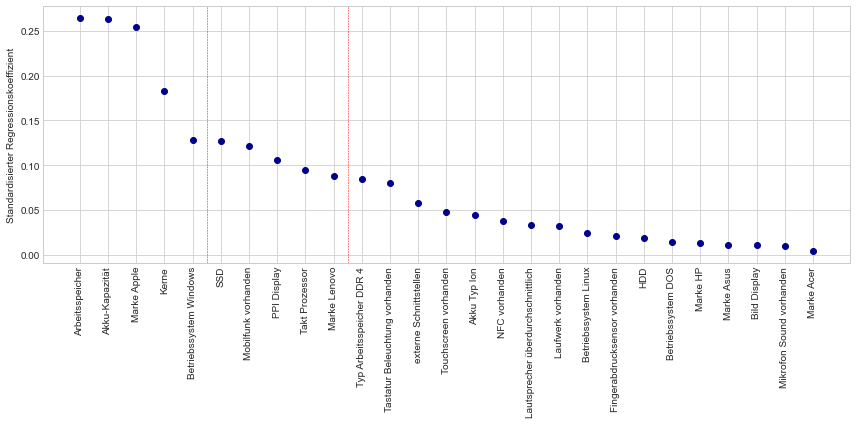

In [72]:
# plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')

# Sort the standardized_coefs in descending order
sorted_coefs = standardized_coefs.sort_values(ascending=False)
sorted_coefs = sorted_coefs.rename(lambda x: x.replace('_', ' '))
sorted_coefs = sorted_coefs.rename({'Akku Typ ION': 'Akku Typ Ion',
                                    'Lautsprecher UEBERDURCHSCHN': 'Lautsprecher überdurchschnittlich',
                                    'Laufwerk VORHANDEN': 'Laufwerk vorhanden',
                                    'Betriebssystem LINUX': 'Betriebssystem Linux',
                                    'Marke ASUS': 'Marke Asus',
                                    'Akku Kapazitaet': 'Akku-Kapazität',
                                    'extern Schnittstellen': 'externe Schnittstellen'})

# Plot the absolute values of coefficients as points with labels
plt.figure(figsize=(12, 6))
plt.scatter(sorted_coefs.index, sorted_coefs.values, marker='o', color='darkblue')
plt.ylabel('Standardisierter Regressionskoeffizient')
plt.xticks(rotation=90)

plt.axvline(x=4.5, color='red', linestyle='--', linewidth = 0.5)
plt.axvline(x=9.5, color='red', linestyle='--', linewidth = 0.5)

plt.grid(True)
plt.tight_layout()
plt.savefig('std_regressionskoeffizienten.pdf') 
plt.show()


In [196]:
np.round(df[top_5_coefs.index].describe(), 2)

,Arbeitsspeicher,Akku_Kapazitaet,Marke_Apple,Kerne,Betriebssystem_Windows,SSD,Mobilfunk_vorhanden,PPI_Display,Takt_Prozessor,Marke_Lenovo,Typ_Arbeitsspeicher_DDR_4,Tastatur_Beleuchtung_vorhanden
count,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00
mean,11.86,55.02,0.07,4.24,0.85,394.00,0.08,160.79,2011.27,0.23,0.88,0.73
std,6.05,16.20,0.25,1.31,0.36,256.86,0.27,43.17,405.89,0.42,0.33,0.44
min,4.00,24.00,0.00,2.00,0.00,0.00,0.00,96.00,1100.00,0.00,0.00,0.00
25%,8.00,45.00,0.00,4.00,1.00,256.00,0.00,141.00,1600.00,0.00,1.00,0.00
50%,8.00,51.00,0.00,4.00,1.00,256.00,0.00,141.00,1800.00,0.00,1.00,1.00
75%,16.00,60.00,0.00,4.00,1.00,512.00,0.00,165.00,2300.00,0.00,1.00,1.00
max,32.00,99.00,1.00,8.00,1.00,2048.00,1.00,331.00,3400.00,1.00,1.00,1.00


In [41]:
df['Preis'].mean()

1333.9633140655105